In [2]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('transactions.csv')

In [4]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


What is the distribution between fraudulent and non-fraudulent transactions?

In [6]:
distribution = df["is_fraud"].value_counts()

In [7]:
distribution

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

Which age groups are more susceptible to fraudulent transactions?

In [8]:
df2 = df.copy()
bins = [1883, 1901, 1928, 1946, 1965, 1981, 1997, 2013, 2024]

df2['dob'] = df2['dob'].str.slice(0,4).astype(int)
df2['generation'] = pd.cut(df2['dob'], bins=bins)

In [9]:
df2["dob"]

0          1988
1          1978
2          1962
3          1967
4          1986
           ... 
1852389    1966
1852390    1999
1852391    1981
1852392    1965
1852393    1993
Name: dob, Length: 1852394, dtype: int32

In [10]:
df2["generation"]

0          (1981, 1997]
1          (1965, 1981]
2          (1946, 1965]
3          (1965, 1981]
4          (1981, 1997]
               ...     
1852389    (1965, 1981]
1852390    (1997, 2013]
1852391    (1965, 1981]
1852392    (1946, 1965]
1852393    (1981, 1997]
Name: generation, Length: 1852394, dtype: category
Categories (8, interval[int64, right]): [(1883, 1901] < (1901, 1928] < (1928, 1946] < (1946, 1965] < (1965, 1981] < (1981, 1997] < (1997, 2013] < (2013, 2024]]

In [11]:
df2["generation"].value_counts()

generation
(1965, 1981]    616544
(1981, 1997]    607074
(1946, 1965]    375216
(1928, 1946]    143747
(1997, 2013]     87831
(1901, 1928]     21982
(1883, 1901]         0
(2013, 2024]         0
Name: count, dtype: int64

In [12]:
counts = pd.crosstab(df2['is_fraud'], df2['generation'])

In [13]:
counts

generation,"(1901, 1928]","(1928, 1946]","(1946, 1965]","(1965, 1981]","(1981, 1997]","(1997, 2013]"
is_fraud,,,,,,
0,21836,142683,372792,613768,604284,87380
1,146,1064,2424,2776,2790,451


In [14]:
label_percentage_per_category = pd.crosstab(df2['generation'], df2['is_fraud'], normalize='all')

In [15]:
label_percentage_per_category

is_fraud,0,1
generation,,
"(1901, 1928]",0.011788,0.000079
"(1928, 1946]",0.077026,0.000574
"(1946, 1965]",0.201249,0.001309
"(1965, 1981]",0.331338,0.001499
"(1981, 1997]",0.326218,0.001506
"(1997, 2013]",0.047171,0.000243


In [16]:
generation_fraud = [(146/(146+21836), (1901,1928)), (1064/(142683 + 1064), (1928,1946)), (2424/(2424+372792), (1946, 1965)), (2776/(613768+2776), (1965, 1981)), (2790/(2790+604284), (1981, 1997)), (451/(451+87380), (1997, 2013))]

In [17]:
generation_fraud

[(0.006641797834591939, (1901, 1928)),
 (0.0074018936047360985, (1928, 1946)),
 (0.006460278879365486, (1946, 1965)),
 (0.004502517257486895, (1965, 1981)),
 (0.0045958153371747105, (1981, 1997)),
 (0.005134861267661759, (1997, 2013))]

If a fraudulent transaction has been committed, what is the expected number of transaction committed per day with the same victim? (Temporal component asking do fraudulent transactions occur multiple times on the same customer)

In [81]:
df["trans_date_trans_time"]

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1852389    2020-12-31 23:59:07
1852390    2020-12-31 23:59:09
1852391    2020-12-31 23:59:15
1852392    2020-12-31 23:59:24
1852393    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [86]:
df_day = df.copy()

df_day['trans_date_trans_time'] = df['trans_date_trans_time'].str.slice(0,10)


In [88]:
label_rows = df_day[df_day['is_fraud'].isin([1])]

In [90]:
label_rows["trans_date_trans_time"]

2449       2019-01-02
2472       2019-01-02
2523       2019-01-02
2546       2019-01-02
2553       2019-01-02
              ...    
1813872    2020-12-22
1813949    2020-12-22
1814016    2020-12-22
1814204    2020-12-22
1814246    2020-12-22
Name: trans_date_trans_time, Length: 9651, dtype: object

In [91]:
label_rows["first"]

2449        Jason
2472        Misty
2523        Misty
2546        Jason
2553        Misty
            ...  
1813872    Travis
1813949    Travis
1814016    Travis
1814204    Travis
1814246    Travis
Name: first, Length: 9651, dtype: object

In [87]:
df_day['trans_date_trans_time'] 

0          2019-01-01
1          2019-01-01
2          2019-01-01
3          2019-01-01
4          2019-01-01
              ...    
1852389    2020-12-31
1852390    2020-12-31
1852391    2020-12-31
1852392    2020-12-31
1852393    2020-12-31
Name: trans_date_trans_time, Length: 1852394, dtype: object

In [99]:
duplicate_rows = label_rows[label_rows.duplicated(['trans_date_trans_time', 'first', 'last', 'is_fraud'])]

In [100]:
duplicate_rows["first"]

2523        Misty
2546        Jason
2553        Misty
2937        Jason
3527        Jason
            ...  
1813872    Travis
1813949    Travis
1814016    Travis
1814204    Travis
1814246    Travis
Name: first, Length: 7725, dtype: object

In [111]:
duplication_counts = duplicate_rows.groupby(['trans_date_trans_time', 'first', 'last', 'is_fraud']).size().reset_index(name='counts')

In [112]:
print(duplication_counts)

     trans_date_trans_time        first      last  is_fraud  counts
0               2019-01-02        Jason    Murphy         1       3
1               2019-01-02        Misty      Hart         1       2
2               2019-01-03      Heather     Chase         1       3
3               2019-01-03        Jason    Murphy         1       3
4               2019-01-03        Misty      Hart         1       3
...                    ...          ...       ...       ...     ...
1836            2020-12-19  Christopher   Gilbert         1       6
1837            2020-12-20       Lauren  Anderson         1       3
1838            2020-12-21       Lauren  Anderson         1       6
1839            2020-12-21       Travis    Daniel         1       2
1840            2020-12-22       Travis    Daniel         1       6

[1841 rows x 5 columns]


In [113]:
duplication_counts["counts"].mean()

4.196089082020641

In [ ]:
average

For each purchase "category," plot the mean and standard "amt" between fraudulent transactions and non-fraudulent transactions

What is the distribution between time transactions between fraudulent transactions and non-fraudulent transactions? What is the most likely time of a fraudulent transaction?

Is there a relationship between the distance between customer location (lat/lon) and merchant location (merch_lat/merch_lon) and fraudulent transactions?

Are certain states, cities, and zip codes more susceptible to fraudulent transactions?

In [49]:
df_location = pd.DataFrame()
df_location["city"] = df["city"].astype('category')
df_location["state"] = df["state"].astype('category')
df_location["zip"] = df["zip"].astype('category')
df_location["is_fraud"] = df["is_fraud"].astype('category')

In [53]:
df_location["city"] = df_location["city"].cat.codes.astype('float')
df_location["state"] = df_location["state"].cat.codes.astype('float')
df_location["zip"] = df_location["zip"].cat.codes.astype('float')
df_location["is_fraud"] = df_location["is_fraud"].cat.codes.astype('float')

In [56]:
df_location.dtypes

city        float64
state       float64
zip         float64
is_fraud    float64
dtype: object

In [55]:
correlation = df_location[['is_fraud', 'city', 'state', 'zip']].corr()
print(correlation)

          is_fraud      city     state       zip
is_fraud  1.000000 -0.001107 -0.000252 -0.002410
city     -0.001107  1.000000 -0.042611  0.076487
state    -0.000252 -0.042611  1.000000 -0.111386
zip      -0.002410  0.076487 -0.111386  1.000000


What is the distribution of fraudulent and non-fraudulent transactions occurring for each day of the week (i.e., Sunday, Monday, etc.), each month of the year (i.e., January, February)?

Compared to any other time of the year, how prevalent are fraudulent transactions during the holidays (11-30 to 12-31)? During post-holidays (1-1 to 2-28)? During the summer (05-24 to 09-01)?

Is there a relationship between between "city_pop" and incidence of fraud?


In [57]:
label_percentage_per_job = pd.crosstab(df2['city_pop'], df2['is_fraud'], normalize='all')

In [58]:
result = label_percentage_per_job.reset_index().sort_values(by=1, ascending=False)


In [59]:
pd.set_option('display.max_rows', 10)


In [60]:
result

is_fraud,city_pop,0,1
890,2906700,0.003145,0.000021
881,1263321,0.002754,0.000021
886,1577385,0.001968,0.000019
866,673342,0.002748,0.000018
166,606,0.004328,0.000017
...,...,...,...
788,103927,0.000394,0.000000
451,3263,0.000788,0.000000
594,7646,0.002365,0.000000
163,595,0.001576,0.000000


Are certain "job" types susceptible to fraudulent transactions?

In [61]:
label_percentage_per_job = pd.crosstab(df2['job'], df2['is_fraud'], normalize='all')

In [62]:
result = label_percentage_per_job.reset_index().sort_values(by=1, ascending=False)


In [63]:
pd.set_option('display.max_rows', 10)


In [64]:
result

is_fraud,job,0,1
383,Quantity surveyor,0.004325,0.000037
309,Naval architect,0.006677,0.000036
287,Materials engineer,0.006289,0.000033
42,Audiological scientist,0.004720,0.000031
421,Senior tax professional/tax inspector,0.003142,0.000031
...,...,...,...
437,Statistician,0.001966,0.000002
107,Contractor,0.002356,0.000001
163,"Engineer, drilling",0.001576,0.000000
161,"Engineer, communications",0.001182,0.000000


In [66]:
df_job = pd.DataFrame()
df_job["city"] = df["city"].astype('category')
df_job["is_fraud"] = df["is_fraud"].astype('category')

In [67]:
df_job["job"] = df_job["city"].cat.codes.astype('float')
df_job["is_fraud"] = df_job["is_fraud"].cat.codes.astype('float')

In [68]:
correlation = df_job['is_fraud'].corr(df_job['job'])
print(f"The correlation between the label and the datapoint is {correlation}")

The correlation between the label and the datapoint is -0.0011073204129480893


Think of at least 4 more questions and provide the answers to them.

1. Some of the variables by themselves showed low correlation, what happens if you bring in investigations from multiple to test correlations? Say from question 2, 7, and 11 to see the results

In [75]:
df_test = pd.DataFrame()

df_test["job"] = df_job["job"]
df_test["city"] = df_location["city"]
df_test["state"] = df_location["state"]
df_test["zip"] = df_location["zip"]
df_test["dob"] = df2["dob"]
df_test["is_fraud"] = df_location["is_fraud"]

In [78]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df_test[['job', 'city', 'state', 'zip', 'dob']] = min_max_scaler.fit_transform(df_test[['job', 'city', 'state', 'zip', 'dob']])


In [79]:
X = df_test.loc[:, df_test.columns != 'is_fraud'].values
y = df_test.loc[:, df_test.columns == 'is_fraud'].values.ravel()

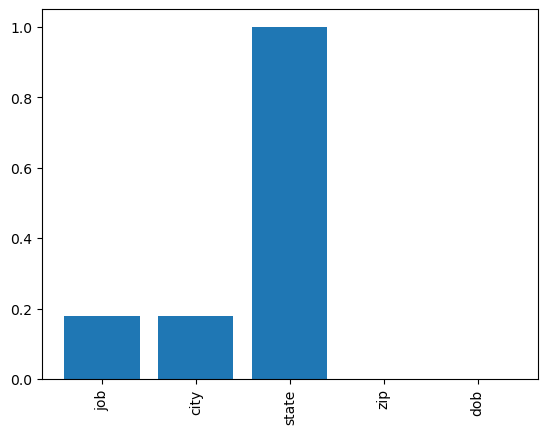

In [80]:
from sklearn.feature_selection import SelectPercentile, f_classif


selector = SelectPercentile(f_classif, percentile=10)
# Fit the data
selector.fit(X, y)
scores = selector.pvalues_
scores /= scores.max()

# Display
cols = list(df_test.loc[:, df_test.columns != 'is_fraud'].columns.values)
y_pos = np.arange(len(cols))
plt.bar(y_pos, scores)
plt.xticks(y_pos, cols, rotation=90)
plt.show()

2. 

3. 

4. 